In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), (1,1), padding='valid', input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), (1,1), padding='valid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=10, activation='softmax'))

d:\Programming\ML\mnist_classification\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [9]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.6067 - loss: 1.2079 - val_accuracy: 0.2279 - val_loss: 2.3239
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9427 - loss: 0.2007 - val_accuracy: 0.8779 - val_loss: 0.3875
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9593 - loss: 0.1436 - val_accuracy: 0.9811 - val_loss: 0.0648
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9675 - loss: 0.1131 - val_accuracy: 0.9827 - val_loss: 0.0534
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.9722 - loss: 0.0934 - val_accuracy: 0.9874 - val_loss: 0.0423
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9761 - loss: 0.0838 - val_accuracy: 0.9885 - val_loss: 0.0357
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9777 - loss: 0.0783 - val_accuracy: 0.9873 - val_loss: 0.0409
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9808 - loss: 0.0703 -

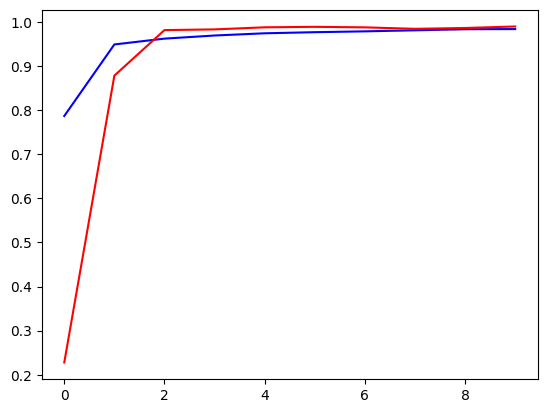

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')